### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [1]:
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
User = pd.read_csv('User.csv')
Item = pd.read_csv('Item.csv')
Data= pd.read_csv('Data.csv')

In [3]:
User

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,2215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [4]:
Data

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [5]:
Item

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1-Jan-95,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1-Jan-95,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1-Jan-95,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1-Jan-95,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,6-Feb-98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,6-Feb-98,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,1-Jan-98,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,1-Jan-94,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [6]:
User.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [7]:
User.shape

(943, 5)

In [8]:
User.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [9]:
User.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [11]:
Data.shape

(100000, 4)

In [12]:
Data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [13]:
Data.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [14]:
Item.shape

(1681, 22)

In [15]:
Item.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
Item.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [17]:
Item.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [18]:
movies_per_genre = pd.DataFrame(data=[Item['unknown'].sum(),Item['Action'].sum(),Item['Adventure'].sum(),
Item['Animation'].sum(),Item['Childrens'].sum(),Item['Comedy'].sum(),Item['Crime'].sum(),Item['Documentary'].sum(),
Item['Drama'].sum(),Item['Fantasy'].sum(),Item['Film-Noir'].sum(),Item['Horror'].sum(),Item['Musical'].sum(),
Item['Mystery'].sum(),Item['Romance'].sum(),Item['Sci-Fi'].sum(),Item['Thriller'].sum(),Item['War'].sum(),
Item['Western'].sum()],
index=['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir',
'Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'],columns=['movies_per_genre'])
movies_per_genre

,movies_per_genre
unknown,1
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22


### 5. Drop the movie where the genre is unknown - 2.5 marks

In [19]:
Item_drop_unkown= Item[Item['unknown']==1].index

In [20]:
Item.drop(Item_drop_unkown, inplace=True)

In [21]:
Item.shape

(1680, 22)

In [83]:
Item['unknown'].value_counts()

0    1680
Name: unknown, dtype: int64

In [22]:
Item.loc[1370:1380]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1370,1372,"Stranger, The",1-Jan-94,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,1374,Falling in Love Again,1-Jan-80,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1373,1375,"Cement Garden, The",1-Jan-93,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1374,1376,Meet Wally Sparks,31-Jan-97,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1375,1377,Hotel de Love,7-Feb-97,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1376,1378,Rhyme & Reason,5-Mar-97,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1377,1379,Love and Other Catastrophes,28-Mar-97,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1378,1380,Hollow Reed,2-May-97,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1379,1381,Losing Chase,1-Jan-96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1380,1382,"Bonheur, Le",16-May-97,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [23]:
Item[Item[['Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']].sum(axis=1)>1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1-Jan-95,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1-Jan-95,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1-Jan-95,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1-Jan-95,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys,1-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-97,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1668,1670,Tainted,1-Feb-98,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1671,1673,Mirage,1-Jan-95,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1677,1679,B. Monkey,6-Feb-98,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [24]:
Item['release date'].max()

'9-Oct-98'

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [25]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [26]:
Item.dtypes

movie id         int64
movie title     object
release date    object
unknown          int64
Action           int64
Adventure        int64
Animation        int64
Childrens        int64
Comedy           int64
Crime            int64
Documentary      int64
Drama            int64
Fantasy          int64
Film-Noir        int64
Horror           int64
Musical          int64
Mystery          int64
Romance          int64
Sci-Fi           int64
Thriller         int64
War              int64
Western          int64
dtype: object

In [27]:
Item['release date str']=Item['release date'].astype('string')
Item['release date str'] 

0       1-Jan-95
1       1-Jan-95
2       1-Jan-95
3       1-Jan-95
4       1-Jan-95
          ...   
1676    6-Feb-98
1677    6-Feb-98
1678    1-Jan-98
1679    1-Jan-94
1680    8-Mar-96
Name: release date str, Length: 1680, dtype: string

In [28]:

Item['release year']=Item['release date str'].apply(lambda x: x[-2:])
Item['release year'].max()

'98'

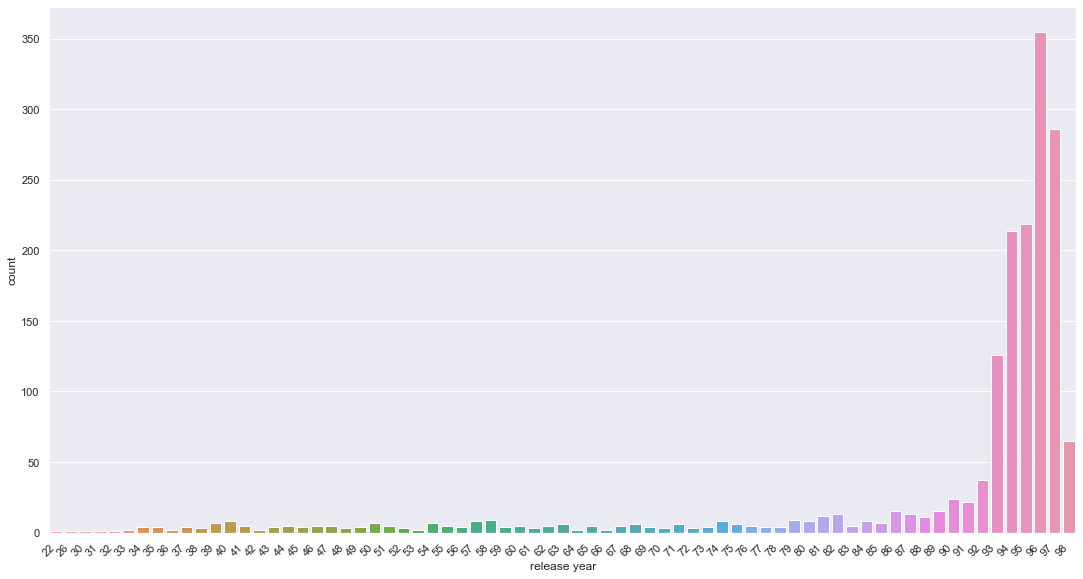

In [29]:
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size':5})
fig= plt.figure(figsize=(15,8))
ax=sns.countplot(Item['release year'],data=Item)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

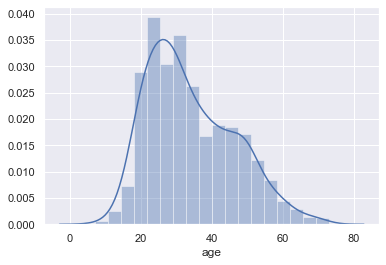

In [30]:
sns.distplot(User['age'])

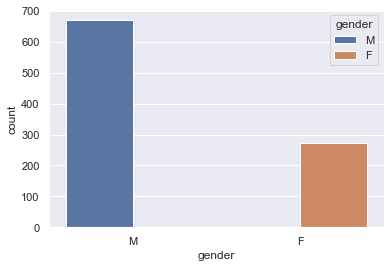

In [31]:
sns.countplot(User['gender'],hue=User['gender']);

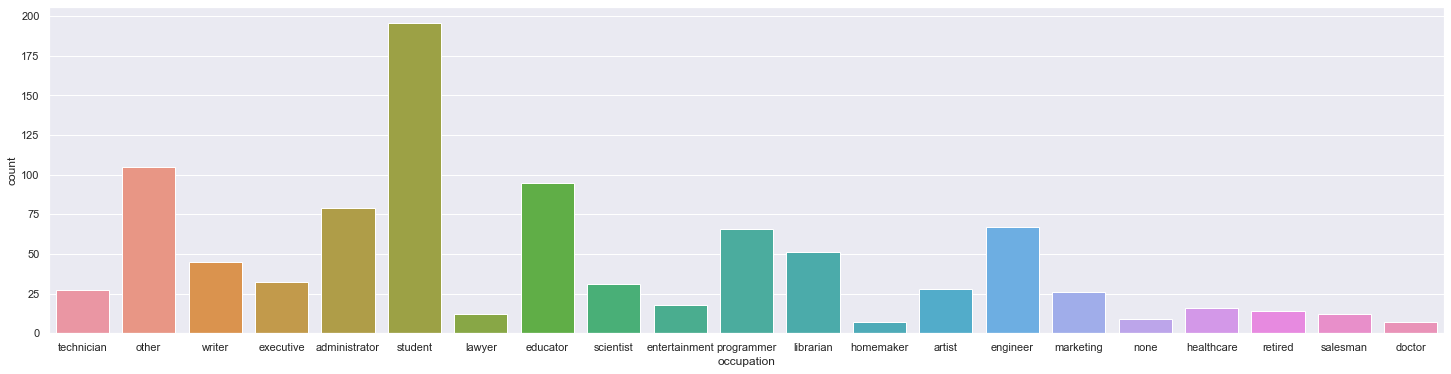

In [32]:
plt.figure(figsize=(25,6))
sns.countplot(User['occupation']);

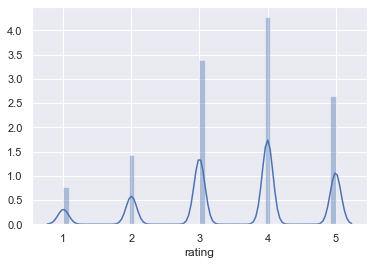

In [33]:
sns.distplot(Data['rating'])


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [34]:
pop=Item.groupby('release year')['Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'].sum()
pop

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,
22,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
32,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
95,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
96,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


In [35]:
pop['total']= pop.sum(axis=1)
pop['popularity']=pop.sum(axis=1)
pop

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total,popularity
release year,,,,,,,,,,,,,,,,,,,,
22,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
26,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2
30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2
31,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3,6
32,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,353,706
95,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,381,762
96,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,559,1118


In [36]:

pop['popularity']=(pop.div(pop['total'], axis= 0) * 100)



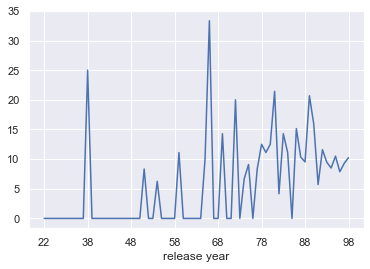

In [37]:
pop['popularity'].plot()




### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [38]:
Data

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [39]:
movie_ID=Data['movie id'].unique()

In [40]:
Data.groupby('movie id')['rating']

In [41]:
x=pd.DataFrame(Data.groupby('movie id')['rating'].sum())

x

,rating
movie id,
1,1753
2,420
3,273
4,742
5,284
...,...
1678,1
1679,3
1680,2


In [42]:
x['avg_rating']=Data.groupby('movie id')['rating'].mean()


In [43]:
x['great_100']=x['rating']

In [44]:
x['great_100']=(x[x['rating']>100])


c=pd.DataFrame(x).reset_index()

In [45]:
c

,movie id,rating,avg_rating,great_100
0,1,1753,3.878319,1753.0
1,2,420,3.206107,420.0
2,3,273,3.033333,273.0
3,4,742,3.550239,742.0
4,5,284,3.302326,284.0
...,...,...,...,...
1677,1678,1,1.000000,NaN
1678,1679,3,3.000000,NaN
1679,1680,2,2.000000,NaN
1680,1681,3,3.000000,NaN


In [46]:
c['movie title']=Item['movie title']

Top_25=c
Top_25=Top_25[['movie title','movie id','rating','avg_rating','great_100']]
Top_25=Top_25.dropna()


In [47]:
Top_25=Top_25.sort_values(by='great_100',ascending=False)
Final_Answer=Top_25.head(25)
Final_Answer

,movie title,movie id,rating,avg_rating,great_100
49,Star Wars,50,2541,4.358491,2541.0
99,Fargo,100,2111,4.155512,2111.0
180,Return of the Jedi,181,2032,4.007890,2032.0
257,Contact,258,1936,3.803536,1936.0
173,Raiders of the Lost Ark,174,1786,4.252381,1786.0
126,"Godfather, The",127,1769,4.283293,1769.0
285,Marvin's Room,286,1759,3.656965,1759.0
0,Toy Story,1,1753,3.878319,1753.0
97,"Silence of the Lambs, The",98,1673,4.289744,1673.0
287,Evita,288,1645,3.441423,1645.0


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [48]:
Data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [49]:
Item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release date str,release year
0,1,Toy Story,1-Jan-95,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1-Jan-95,95
1,2,GoldenEye,1-Jan-95,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1-Jan-95,95
2,3,Four Rooms,1-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1-Jan-95,95
3,4,Get Shorty,1-Jan-95,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1-Jan-95,95
4,5,Copycat,1-Jan-95,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1-Jan-95,95


In [50]:
User.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [51]:
Top_25.head()

,movie title,movie id,rating,avg_rating,great_100
49,Star Wars,50,2541,4.358491,2541.0
99,Fargo,100,2111,4.155512,2111.0
180,Return of the Jedi,181,2032,4.007890,2032.0
257,Contact,258,1936,3.803536,1936.0
173,Raiders of the Lost Ark,174,1786,4.252381,1786.0


In [52]:
set1=pd.merge(User,Data,on='user id',how='inner')
del set1['timestamp']
set1
group=pd.merge(set1,Item,on='movie id', how='inner')
group.columns

Index(['user id', 'age', 'gender', 'occupation', 'zip code', 'movie id',
       'rating', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'release date str',
       'release year'],
      dtype='object')

In [53]:
clean= group.drop(['age','occupation', 'zip code','release date', 'unknown','Action',
'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary','Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
'Thriller', 'War', 'Western', 'release date str','release year'], axis=1)

In [54]:
clean

,user id,gender,movie id,rating,movie title,Drama,Romance,Sci-Fi
0,1,M,61,4,Three Colors: White,1,0,0
1,13,M,61,4,Three Colors: White,1,0,0
2,18,F,61,4,Three Colors: White,1,0,0
3,58,M,61,5,Three Colors: White,1,0,0
4,59,M,61,4,Three Colors: White,1,0,0
...,...,...,...,...,...,...,...,...
99985,863,M,1679,3,B. Monkey,0,1,0
99986,863,M,1678,1,Mat' i syn,1,0,0
99987,863,M,1680,2,Sliding Doors,1,1,0
99988,896,M,1681,3,You So Crazy,0,0,0


In [55]:
total_drama=clean.loc[clean['Drama']==1]
total_drama

,user id,gender,movie id,rating,movie title,Drama,Romance,Sci-Fi
0,1,M,61,4,Three Colors: White,1,0,0
1,13,M,61,4,Three Colors: White,1,0,0
2,18,F,61,4,Three Colors: White,1,0,0
3,58,M,61,5,Three Colors: White,1,0,0
4,59,M,61,4,Three Colors: White,1,0,0
...,...,...,...,...,...,...,...,...
99983,851,M,1675,3,"Sunchaser, The",1,0,0
99984,854,F,1677,3,Sweet Nothing,1,0,0
99986,863,M,1678,1,Mat' i syn,1,0,0
99987,863,M,1680,2,Sliding Doors,1,1,0


In [56]:
total_drama['rating'].sum()

147108

In [57]:
male_drama=total_drama.loc[total_drama['gender']=='M']

In [58]:
male_drama['rating'].sum()

106794

In [59]:
female_drama=total_drama.loc[total_drama['gender']=='F']

In [60]:
female_drama['rating'].sum()

40314

In [61]:
((female_drama['rating'].sum())/(total_drama['rating'].sum()))*100

27.404355983359164

In [62]:
((male_drama['rating'].sum())/(total_drama['rating'].sum()))*100

72.59564401664083

# Statment 1: True
# 72.6% of individuals who watch dramas are male, while 27.40% are Female

In [63]:
total_scifi=clean.loc[clean['Sci-Fi']==1]
total_scifi

,user id,gender,movie id,rating,movie title,Drama,Romance,Sci-Fi
643,1,M,171,5,Delicatessen,0,0,1
644,7,M,171,3,Delicatessen,0,0,1
645,23,F,171,5,Delicatessen,0,0,1
646,49,F,171,4,Delicatessen,0,0,1
647,58,M,171,5,Delicatessen,0,0,1
...,...,...,...,...,...,...,...,...
99139,774,M,1419,1,Highlander III: The Sorcerer,0,0,1
99140,889,M,1419,2,Highlander III: The Sorcerer,0,0,1
99431,257,M,1472,2,"Visitors, The (Visiteurs, Les)",0,0,1
99432,523,F,1472,5,"Visitors, The (Visiteurs, Les)",0,0,1


In [64]:
total_scifi['rating'].sum()

45328

In [65]:
male_scifi=total_scifi.loc[total_scifi['gender']=='M']

In [66]:
male_scifi['rating'].sum()

36132

In [67]:
female_scifi=total_scifi.loc[total_scifi['gender']=='F']

In [68]:
female_scifi['rating'].sum()

9196

In [69]:
((male_scifi['rating'].sum())/(total_scifi['rating'].sum()))*100

79.71231909636428

In [70]:
((female_scifi['rating'].sum())/(total_scifi['rating'].sum()))*100

20.28768090363572

# Statment 2: False
# 79.71% of individuals who watch dramas are male, while 20.28% are Female

In [71]:
total_rome=clean.loc[clean['Romance']==1]
total_rome

,user id,gender,movie id,rating,movie title,Drama,Romance,Sci-Fi
125,1,M,33,4,Desperado,0,1,0
126,10,M,33,4,Desperado,0,1,0
127,13,M,33,5,Desperado,0,1,0
128,16,M,33,2,Desperado,0,1,0
129,59,M,33,3,Desperado,0,1,0
...,...,...,...,...,...,...,...,...
99956,883,M,1656,5,Little City,0,1,0
99964,762,M,1662,1,Rough Magic,1,1,0
99965,782,F,1662,4,Rough Magic,1,1,0
99985,863,M,1679,3,B. Monkey,0,1,0


In [72]:
total_rome['rating'].sum()

70482

In [73]:
male_rome=total_rome.loc[total_rome['gender']=='M']

In [74]:
male_rome['rating'].sum()

49067

In [75]:
female_rome=total_rome.loc[total_rome['gender']=='F']

In [76]:
female_rome['rating'].sum()

21415

In [77]:
((female_rome['rating'].sum())/(total_rome['rating'].sum()))*100

30.383644050963365

In [78]:
((male_rome['rating'].sum())/(total_rome['rating'].sum()))*100

69.61635594903663

# Statment 3: True
# 69.61% of individuals who watch dramas are male, while 30.38% are Female

In [81]:
echo "This repository records all the project works that I did in my PGP-AIML program with UT Austin and Great Learning" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M master
git remote add origin https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-c4bantle.git
git push -u origin master

SyntaxError: invalid syntax (<ipython-input-81-834e97636615>, line 1)

#link to github
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-c4bantle